In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import style
plt.style.use('fivethirtyeight')
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
df = pd.read_csv('cardioActivities.csv')


Populating the interactive namespace from numpy and matplotlib


In [2]:
df.head()

,Date,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Notes,GPX File
0,2016-09-18 17:23:13,Running,NaN,8.13,1:20:47,9:56,6.04,526.000000,85.85,NaN,Slow and good run. Perfect weather.,2016-09-18-1723.gpx
1,2016-09-11 16:21:14,Walking,NaN,1.55,18:31,11:58,5.01,89.975704,NaN,NaN,Walking,NaN
2,2016-09-09 19:52:37,Walking,NaN,1.36,17:09,12:37,4.75,84.963795,NaN,NaN,Walking,NaN
3,2016-09-09 14:46:07,Walking,NaN,1.51,18:29,12:15,4.90,89.021055,NaN,NaN,Walking,NaN
4,2016-09-08 14:53:21,Walking,NaN,1.48,17:45,11:58,5.01,88.066405,NaN,NaN,Walking,NaN


In [3]:

df.head()

df['Date'] = pd.to_datetime(df['Date'])
# Average distance per activity.
total_avg = df['Distance (km)'].sum()/df['Distance (km)'].count()

walk_data = df[df['Type'].str.contains('Walking')]
walk_avg = walk_data['Distance (km)'].sum()/walk_data['Distance (km)'].count()
cal_walk_avg = walk_data['Calories Burned'].sum()/walk_data['Calories Burned'].count()

run_data = df[df['Type'].str.contains('Running')]
run_avg = run_data['Distance (km)'].sum()/run_data['Distance (km)'].count()
cal_run_avg = run_data['Calories Burned'].sum()/run_data['Calories Burned'].count()


cal_avg = (run_data['Calories Burned'].sum() + walk_data['Calories Burned'].sum())/(walk_data['Distance (km)'].count() + run_data['Distance (km)'].count())
print 'Number of total activities ', (walk_data['Distance (km)'].count() + run_data['Distance (km)'].count())
print 'Total distance ', walk_data['Distance (km)'].sum() + run_data['Distance (km)'].sum(), ' km'
print 'Total Calories burned ',"{0:.0f}".format(run_data['Calories Burned'].sum() + walk_data['Calories Burned'].sum()) , ' Cal'
print 'Average distance per activity ', "{0:.2f}".format(total_avg), ' km'
print 'Average Calories burned per activity ',"{0:.0f}".format(cal_avg) , ' Cal'
print '--------------------------------------------------'

print 'Number of walking  activities ', walk_data['Distance (km)'].count() 
print 'Total distance in walking ', walk_data['Distance (km)'].sum(), ' km' 
print 'Average distance per walking activity ', (walk_avg), ' km'
print 'Average Calories burned per walking activity ',"{0:.0f}".format(cal_walk_avg) , ' Cal'
print '--------------------------------------------------'

print 'Number of running activities ', run_data['Distance (km)'].count()
print 'Total distance in running ', run_data['Distance (km)'].sum(), ' km'
print 'Average distance per running activity ', (run_avg), ' km'
print 'Average Calories burned per running activity ',"{0:.0f}".format(cal_run_avg) , ' Cal'
print '--------------------------------------------------'


Number of total activities  312
Total distance  754.53  km
Total Calories burned  52214  Cal
Average distance per activity  2.45  km
Average Calories burned per activity  167  Cal
--------------------------------------------------
Number of walking  activities  222
Total distance in walking  383.25  km
Average distance per walking activity  1.72635135135  km
Average Calories burned per walking activity  109  Cal
--------------------------------------------------
Number of running activities  90
Total distance in running  371.28  km
Average distance per running activity  4.12533333333  km
Average Calories burned per running activity  308  Cal
--------------------------------------------------


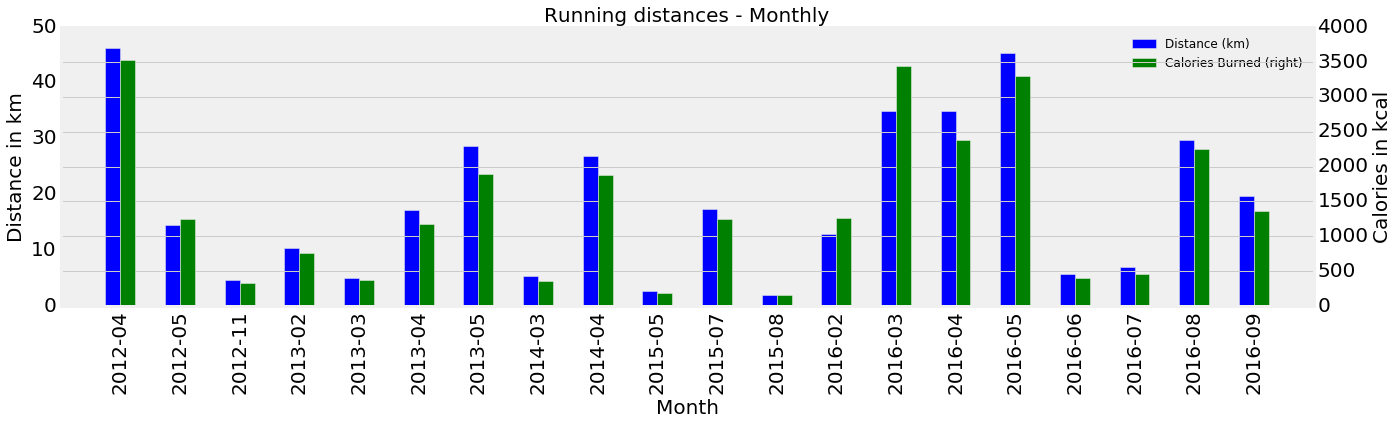

In [4]:
#Running 

#Monthy
r_monthly = run_data['Date'].dt.to_period('M')
w_monthly = walk_data['Date'].dt.to_period('M')
fsz=20;

# df['Calories Burned'] = 
ax = pd.groupby(run_data, r_monthly)['Distance (km)'].sum().plot(kind='bar',position=1,legend = True,width = .25, figsize = (20,5))
ax2 = pd.groupby(run_data, r_monthly)['Calories Burned'].sum().plot( secondary_y=True,legend = True,kind = 'bar',width = .25, color = 'green',position=0)
ax.set_xlim([-1, 20])


ax.set_xlabel('Month', fontsize = fsz)
ax.set_ylabel('Distance in km',fontsize = fsz)
ax2.set_ylabel('Calories in kcal',fontsize = fsz)

patches, labels = ax.get_legend_handles_labels()
labels = ['Distance', 'Calories Burned']
ax.set_title('Running distances - Monthly', fontsize = fsz)

ax.tick_params(axis='both', which='major', labelsize=fsz)
ax2.tick_params(axis='both', which='major', labelsize=fsz)
ax.grid(False)

fig = ax.get_figure()
fig.savefig('dist-cal-run-monthly.png',transparent=True, bbox_inches='tight', pad_inches=0)



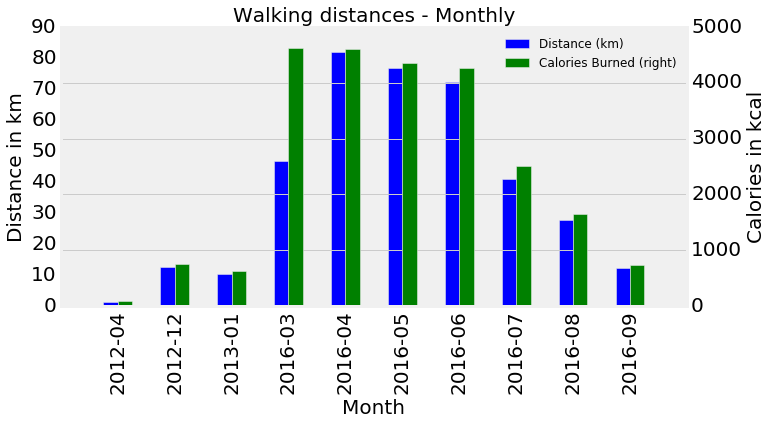

In [5]:
#Walking 

#Monthy

w_monthly = walk_data['Date'].dt.to_period('M')
fsz=20;

# df['Calories Burned'] = 
ax = pd.groupby(walk_data, w_monthly)['Distance (km)'].sum().plot(kind='bar',legend = True, position=1,width = .25, figsize = (10,5))
ax2 = pd.groupby(walk_data, w_monthly)['Calories Burned'].sum().plot( secondary_y=True,legend = True,kind = 'bar',width = .25, color = 'green',position=0)
ax.set_xlim([-1, 10])


ax.set_xlabel('Month', fontsize = fsz)
ax.set_ylabel('Distance in km',fontsize = fsz)
ax2.set_ylabel('Calories in kcal',fontsize = fsz)

labels = ['Distance', 'Calories Burned']
ax.set_title('Walking distances - Monthly', fontsize = fsz)

labels = ['Distance', 'Calories Burned']

ax.tick_params(axis='both', which='major', labelsize=fsz)
ax2.tick_params(axis='both', which='major', labelsize=fsz)

fig = ax.get_figure()
fig.savefig('dist-cal-walk-monthly.png',transparent=True, bbox_inches='tight', pad_inches=0)

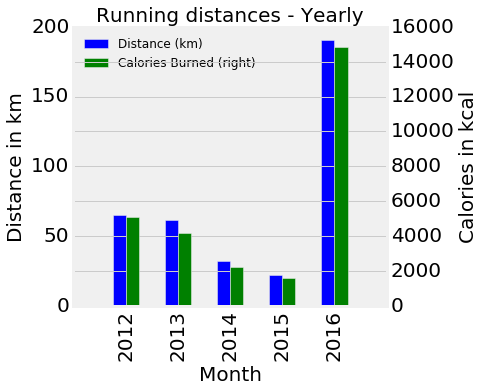

In [6]:
#Yearly Running

r_monthly = run_data['Date'].dt.to_period('A')
fsz=20;

# df['Calories Burned'] = 
ax = pd.groupby(run_data, r_monthly)['Distance (km)'].sum().plot(kind='bar',position=1,legend = True,width = .25, figsize = (5,5))
ax2 = pd.groupby(run_data, r_monthly)['Calories Burned'].sum().plot( secondary_y=True,legend = True,kind = 'bar',width = .25, color = 'green',position=0)
ax.set_xlim([-1, 5])


ax.set_xlabel('Month', fontsize = fsz)
ax.set_ylabel('Distance in km',fontsize = fsz)
ax2.set_ylabel('Calories in kcal',fontsize = fsz)

patches, labels = ax.get_legend_handles_labels()
labels = ['Distance', 'Calories Burned']
ax.set_title('Running distances - Yearly', fontsize = fsz)

ax.tick_params(axis='both', which='major', labelsize=fsz)
ax2.tick_params(axis='both', which='major', labelsize=fsz)

fig = ax.get_figure()
fig.savefig('dist-cal-run-yearly.png',transparent=True, bbox_inches='tight', pad_inches=0)

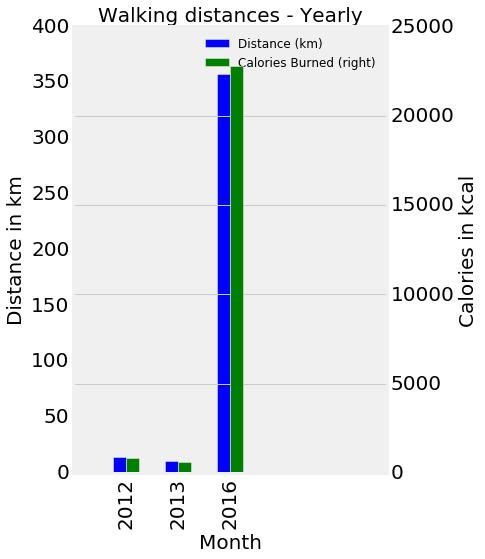

In [7]:
#Yearly Walking

w_monthly = walk_data['Date'].dt.to_period('A')
fsz=20;

# df['Calories Burned'] = 
ax = pd.groupby(walk_data, w_monthly)['Distance (km)'].sum().plot(kind='bar',position=1,legend = True,width = .25, figsize = (5,8))
ax2 = pd.groupby(walk_data, w_monthly)['Calories Burned'].sum().plot( secondary_y=True,legend = True,kind = 'bar',width = .25, color = 'green',position=0)
ax.set_xlim([-1, 5])


ax.set_xlabel('Month', fontsize = fsz)
ax.set_ylabel('Distance in km',fontsize = fsz)
ax2.set_ylabel('Calories in kcal',fontsize = fsz)

patches, labels = ax.get_legend_handles_labels()
labels = ['Distance', 'Calories Burned']
ax.set_title('Walking distances - Yearly', fontsize = fsz)

ax.tick_params(axis='both', which='major', labelsize=fsz)
ax2.tick_params(axis='both', which='major', labelsize=fsz)

fig = ax.get_figure()
fig.savefig('dist-cal-walk-yearly.png',transparent=True, bbox_inches='tight', pad_inches=0)

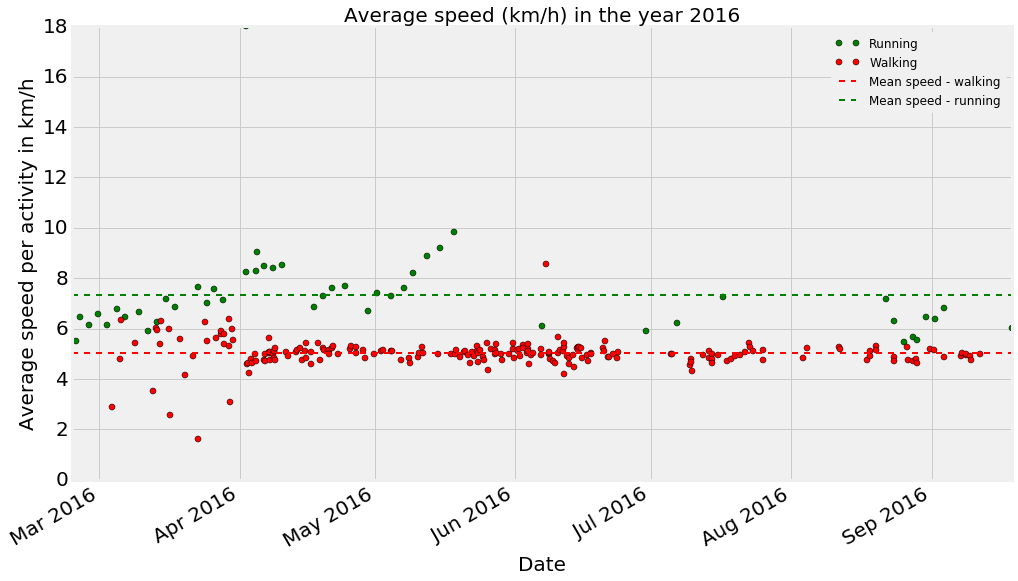

In [8]:
#Average Speed for running and walking 
#Y, M, D
import datetime as dt     
start_range = datetime.datetime(2016 ,1, 1)
end_range = dt.datetime.today()


# %pylab inline
# pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots


avgspeed_walk = pd.DataFrame()
avgspeed_run = pd.DataFrame()
avgspeed_walk_run = pd.DataFrame()



# avgspeed_walk[['Date','Walking','Type']]  = walk_data[['Date', 'Average Speed (km/h)','Type']]
# avgspeed_run[['Date', 'Running','Type']]  = run_data[['Date','Average Speed (km/h)','Type']]

avgspeed_walk[['Date','Walking','Type']]  = walk_data[['Date', 'Average Speed (km/h)','Type']]
avgspeed_run[['Date', 'Running','Type']]  = run_data[['Date','Average Speed (km/h)','Type']]


avgspeed_run.set_index('Date', inplace = True)
avgspeed_walk.set_index('Date', inplace = True)


avgspeed_run = avgspeed_run[end_range:start_range]
avgspeed_walk = avgspeed_walk[end_range:start_range]



ax = avgspeed_run.plot(marker='o', linestyle = 'None', color = 'green')
avgspeed_walk.plot(ax = ax, marker='o', linestyle = 'None', color = 'red')


avgspeed_walk_mean = avgspeed_walk['Walking'].mean()
ax.axhline(avgspeed_walk_mean, color='r', linestyle='--',linewidth = 2, label = 'Mean speed - walking')

avgspeed_run_mean = avgspeed_run['Running'].mean()
ax.axhline(avgspeed_run_mean, color='g', linestyle='--',linewidth = 2,label = 'Mean speed - running')

pylab.legend(loc='upper right')
patches, labels = ax.get_legend_handles_labels()
labels = ['Date', 'Average speed per activity']
ax.set_label(labels)
ax.set_title('Average speed (km/h) in the year 2016', fontsize = fsz)
ax.tick_params(axis='both', which='major', labelsize=fsz)

ax.set_ylabel('Average speed per activity in km/h', fontsize = fsz)
ax.set_xlabel('Date',fontsize = fsz)

fig = ax.get_figure()
fig.savefig('avg-speed-this-year.png',transparent=True, bbox_inches='tight', pad_inches=0)


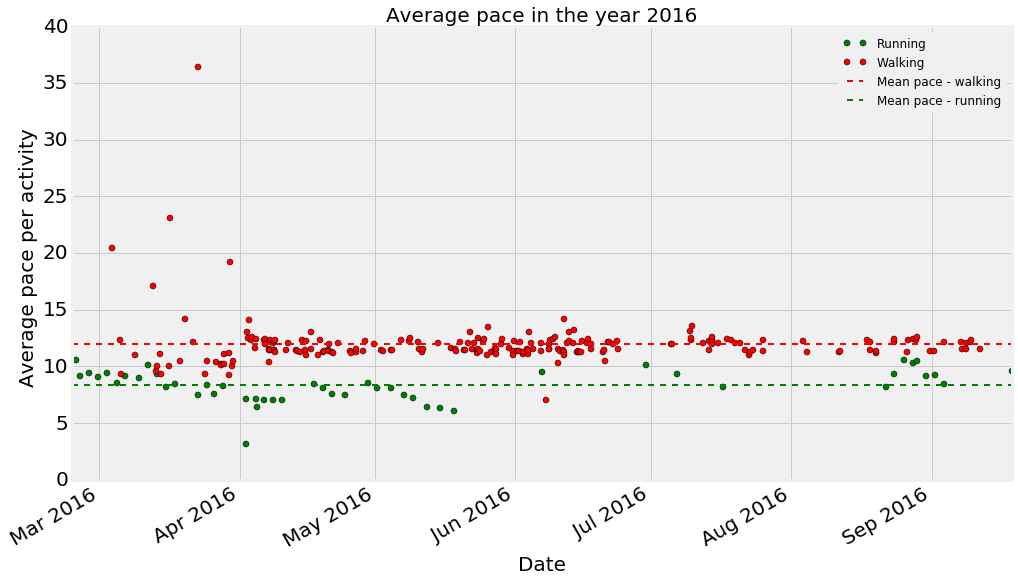

In [9]:
#Average pace for running and walking 
#Y, M, D

start_range = datetime.datetime(2016 ,1, 1)
end_range = dt.datetime.today()


# %pylab inline
# pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots


avgspeed_walk = pd.DataFrame()
avgspeed_run = pd.DataFrame()
avgspeed_walk_run = pd.DataFrame()

avgspeed_walk[['Date','Walking','Type']]  = walk_data[['Date', 'Average Pace','Type']]
avgspeed_run[['Date', 'Running','Type']]  = run_data[['Date','Average Pace','Type']]


avgspeed_run.set_index('Date', inplace = True)
avgspeed_walk.set_index('Date', inplace = True)

avgspeed_run['Running'] = avgspeed_run['Running'].str.replace(':', '.')
avgspeed_run['Running'] = avgspeed_run['Running'].astype(float)

avgspeed_walk['Walking'] = avgspeed_walk['Walking'].str.replace(':', '.')
avgspeed_walk['Walking'] = avgspeed_walk['Walking'].astype(float)

avgspeed_run = avgspeed_run[end_range:start_range]
avgspeed_walk = avgspeed_walk[end_range:start_range]

ax = avgspeed_run.plot(marker='o', linestyle = 'None', color = 'green')
avgspeed_walk.plot(ax = ax, marker='o', linestyle = 'None', color = 'red')


avgspeed_walk_mean = avgspeed_walk['Walking'].mean()
ax.axhline(avgspeed_walk_mean, color='r', linestyle='--',linewidth = 2, label = 'Mean pace - walking')

avgspeed_run_mean = avgspeed_run['Running'].mean()
ax.axhline(avgspeed_run_mean, color='g', linestyle='--',linewidth = 2,label = 'Mean pace - running')

pylab.legend(loc='upper right')
patches, labels = ax.get_legend_handles_labels()
labels = ['Date', 'Average pace per activity']
ax.set_label(labels)
ax.set_title('Average pace in the year 2016', fontsize = fsz)
ax.tick_params(axis='both', which='major', labelsize=fsz)

ax.set_ylabel('Average pace per activity ', fontsize = fsz)
ax.set_xlabel('Date',fontsize = fsz)

fig = ax.get_figure()
fig.savefig('avg-pace-this-year.png',transparent=True, bbox_inches='tight', pad_inches=0)

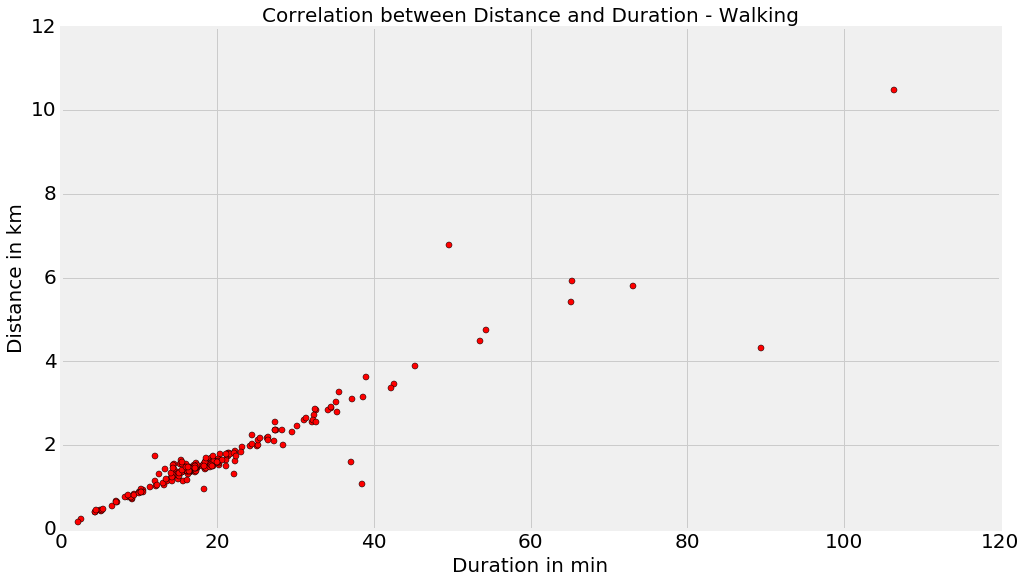

In [10]:
#Correlation between Distance and Duration 
walk_dist_dur = pd.DataFrame()
walk_dist_dur[['Date','Distance','Duration']] = walk_data[['Date', 'Distance (km)','Duration']]
# walk_dist_dur['Duration'] = walk_dist_dur['Duration'].str.replace(':','.')
# walk_dist_dur['Duration'] = walk_dist_dur['Duration'].astype(float)
# temp_data =  pd.to_datetime(walk_dist_dur['Duration'])
temp_data = walk_dist_dur['Duration'].str.split(':')
# print temp_data.head()
duration_data = []
for each_entry in temp_data:
    if len(each_entry) <= 2: 
        dur = each_entry[0]+'.'+each_entry[1]
        duration_data.append(dur)
    else:
        key1 = (int(each_entry[0]) * 60) + int(each_entry[1])
        dur = str(key1)+'.'+each_entry[2]
        duration_data.append(dur)
#         print dur
walk_dist_dur['Duration'] = duration_data
walk_dist_dur['Duration'] = walk_dist_dur['Duration'].astype(float)

# walk_dist_dur.info()
plt.plot(walk_dist_dur['Duration'],walk_dist_dur['Distance'],marker='o', linestyle = 'None' ,color='r')

plt.title('Correlation between Distance and Duration - Walking', fontsize = fsz)
plt.tick_params(axis='both', which='major', labelsize=fsz)

plt.ylabel('Distance in km', fontsize = fsz)
plt.xlabel('Duration in min',fontsize = fsz)

plt.savefig('correlation-walking.png',transparent=True, bbox_inches='tight', pad_inches=0)



In [11]:
walk_data.head()

,Date,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Notes,GPX File
1,2016-09-11 16:21:14,Walking,NaN,1.55,18:31,11:58,5.01,89.975704,NaN,NaN,Walking,NaN
2,2016-09-09 19:52:37,Walking,NaN,1.36,17:09,12:37,4.75,84.963795,NaN,NaN,Walking,NaN
3,2016-09-09 14:46:07,Walking,NaN,1.51,18:29,12:15,4.90,89.021055,NaN,NaN,Walking,NaN
4,2016-09-08 14:53:21,Walking,NaN,1.48,17:45,11:58,5.01,88.066405,NaN,NaN,Walking,NaN
5,2016-09-08 14:12:51,Walking,NaN,1.41,17:08,12:08,4.94,68.973418,NaN,NaN,Walking,NaN


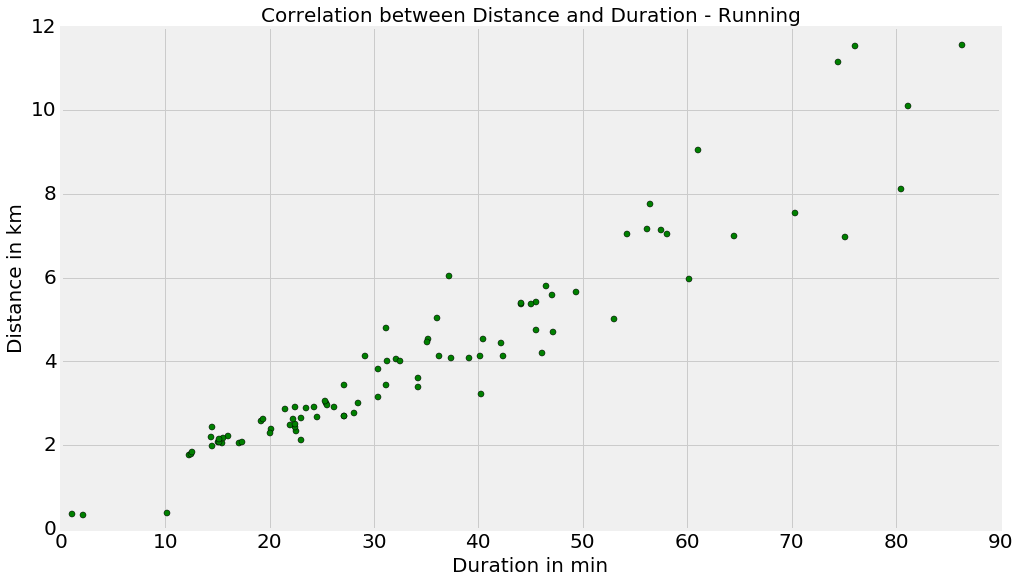

In [12]:
#Correlation between Distance and Duration 
run_dist_dur = pd.DataFrame()
run_dist_dur[['Date','Distance','Duration']] = run_data[['Date', 'Distance (km)','Duration']]
# run_dist_dur['Duration'] = run_dist_dur['Duration'].str.replace(':','.')
# run_dist_dur['Duration'] = run_dist_dur['Duration'].astype(float)
# temp_data =  pd.to_datetime(run_dist_dur['Duration'])
temp_data = run_dist_dur['Duration'].str.split(':')
# print temp_data.head()
duration_data = []
for each_entry in temp_data:
    if len(each_entry) <= 2: 
        dur = each_entry[0]+'.'+each_entry[1]
        duration_data.append(dur)
    else:
        key1 = (int(each_entry[0]) * 60) + int(each_entry[1])
        dur = str(key1)+'.'+each_entry[2]
        duration_data.append(dur)
#         print dur
run_dist_dur['Duration'] = duration_data
run_dist_dur['Duration'] = run_dist_dur['Duration'].astype(float)

# run_dist_dur.info()
plt.plot(run_dist_dur['Duration'],run_dist_dur['Distance'],marker='o', linestyle = 'None' ,color='g' )

plt.title('Correlation between Distance and Duration - Running', fontsize = fsz)
plt.tick_params(axis='both', which='major', labelsize=fsz)

plt.ylabel('Distance in km', fontsize = fsz)
plt.xlabel('Duration in min',fontsize = fsz)

plt.savefig('correlation-running.png',transparent=True, bbox_inches='tight', pad_inches=0)



